In [ ]:
"""TITLE:Analyze maternal and child health indicators like mortality and immunization rates.
    Project ID: CBIT/IT-1/EDAV/2025/CEP-36
    Roll No: 160124737007
    Name: D Hari Niveditha
    Department of Information Technology
    Chaitanya Bharathi Institute of Technology,Hyderabad

Problem Overview:
Maternal and child health are vital for a country's development. Analyzing the provided data on maternal, infant, and under-5 mortality rates,
along with immunization coverage and health expenditure, helps to pinpoint trends, disparities, and areas that require policy intervention in 
India. This analysis is crucial for improving health outcomes.
DataSetLink:
          https://drive.google.com/drive/u/0/folders/1tnW78a7eCAMs8DsK7jelfD0lewz_Y8wE

Environment:
            python --version:  Python 3.13.5
            Libraries Used:numpy,pandas
"""


In [2]:
#importing the required libraries 
import pandas as pd
import numpy as np

#loading dataset from the file path
df = pd.read_csv("C:\\Users\\siric\\Downloads\\maternal_child_health_india_clean.csv")
print(df.columns) #displaying column names of the dataset
#displaying first 5 rows
print("First 5 rows: \n", df.head(),"\n")

Index(['Country', 'State', 'Year', 'Age_Group', 'Maternal_Mortality_Rate',
       'Infant_Mortality_Rate', 'Under5_Mortality_Rate',
       'Immunization_Coverage', 'Health_Expenditure_PerCapita', 'Urban_Rural'],
      dtype='object')
First 5 rows: 
   Country      State  Year    Age_Group  Maternal_Mortality_Rate  \
0   India  Telangana  2018      <1 year                    162.0   
1   India  Telangana  2018      <1 year                    270.0   
2   India  Telangana  2018    1-5 years                    209.0   
3   India  Telangana  2018    1-5 years                    263.0   
4   India  Telangana  2018  15-49 years                    229.0   

   Infant_Mortality_Rate  Under5_Mortality_Rate  Immunization_Coverage  \
0                     43                     51                   80.0   
1                     37                     41                   80.0   
2                     16                     25                   81.0   
3                     36                     

In [3]:
#Question1: Calculate mortality rates using numpy(Bloom's Level: 3)
# Drop rows with missing values to ensure clean analysis
dfDropna = df.dropna()

# Select only the columns related to mortality rates for focused analysis
dfMaternal = dfDropna[["Maternal_Mortality_Rate", "Infant_Mortality_Rate", "Under5_Mortality_Rate"]]

# Maternal Mortality Rate Analysis
print("Maternal Mortality Rate - Statistics \n")

print("Mean: ",np.mean(dfMaternal["Maternal_Mortality_Rate"]))
print("Median: ",np.median(dfMaternal["Maternal_Mortality_Rate"]))
print("Min: ",np.min(dfMaternal["Maternal_Mortality_Rate"]))
print("Max: ",np.max(dfMaternal["Maternal_Mortality_Rate"]))
print("Standard deviation: ",np.std(dfMaternal["Maternal_Mortality_Rate"]))

# Infant Mortality Rate Analysis
print("\nInfant Mortality Rate - Statistics\n")

print("Mean: ",np.mean(dfMaternal["Infant_Mortality_Rate"]))
print("Median: ",np.median(dfMaternal["Infant_Mortality_Rate"]))
print("Min: ",np.min(dfMaternal["Infant_Mortality_Rate"]))
print("Max: ",np.max(dfMaternal["Infant_Mortality_Rate"]))
print("Standard deviation: ",np.std(dfMaternal["Infant_Mortality_Rate"]))

# Under-Five Mortality Rate Analysis
print("\nUnder Five Mortality Rate - Statistics\n")

print("Mean: ",np.mean(dfMaternal["Under5_Mortality_Rate"]))
print("Median: ",np.median(dfMaternal["Under5_Mortality_Rate"]))
print("Min: ",np.min(dfMaternal["Under5_Mortality_Rate"]))
print("Max: ",np.max(dfMaternal["Under5_Mortality_Rate"]))
print("Standard deviation: ",np.std(dfMaternal["Under5_Mortality_Rate"]))

Maternal Mortality Rate - Statistics 

Mean:  161.8544776119403
Median:  158.0
Min:  40.0
Max:  299.0
Standard deviation:  75.97990024437394

Infant Mortality Rate - Statistics

Mean:  32.25373134328358
Median:  31.5
Min:  5
Max:  59
Standard deviation:  14.832742405607508

Under Five Mortality Rate - Statistics

Mean:  37.649253731343286
Median:  37.0
Min:  9
Max:  67
Standard deviation:  14.826739389886784


In [4]:
#Question2: Filter data by region and year(Bloom's Level: 3)
# Define the region and year you want to filter
state_name = "Telangana"  #Region to analyse
year = 2020   #Year to analyse
#Filter the DataFrame based on state and year
filtered_df = df[(df["State"] == state_name) & (df["Year"] == year)]
# Display the filtered subset of data
print(filtered_df)

   Country      State  Year    Age_Group  Maternal_Mortality_Rate  \
12   India  Telangana  2020      <1 year                    267.0   
13   India  Telangana  2020      <1 year                    247.0   
14   India  Telangana  2020    1-5 years                    147.0   
15   India  Telangana  2020    1-5 years                    195.0   
16   India  Telangana  2020  15-49 years                    100.0   
17   India  Telangana  2020  15-49 years                    210.0   

    Infant_Mortality_Rate  Under5_Mortality_Rate  Immunization_Coverage  \
12                     59                     62                   84.0   
13                     59                     61                   84.0   
14                     15                     20                    NaN   
15                     49                     53                   70.0   
16                     42                     50                   78.0   
17                     38                     44                  

In [5]:
#Question3: Fill missing health indicator values (Bloom's Level: 4)
# Display the number of missing values in the 'Immunization_Coverage' column before filling
print("No.of empty immunization coverage values before filling")
print(df["Immunization_Coverage"].isnull().sum())

# Fill the missing values in 'Immunization_Coverage' with mean value of the column
#using inplace will apply the changes directly in the dataframe
df.fillna({"Immunization_Coverage": df["Immunization_Coverage"].mean()},inplace=True)
print("\nImmunization_Coverage:\n",df["Immunization_Coverage"])

# verify whether the number of missing values in the 'Immunization_Coverage' column after filling are zero
print("No.of empty immunization coverage values after filling")
print(df["Immunization_Coverage"].isnull().sum())

No.of empty immunization coverage values before filling
10

Immunization_Coverage:
 0      80.0
1      80.0
2      81.0
3      81.0
4      85.0
       ... 
295    71.0
296    84.0
297    71.0
298    81.0
299    79.0
Name: Immunization_Coverage, Length: 300, dtype: float64
No.of empty immunization coverage values after filling
0


In [6]:
#Q4: Group data by age and location (Bloom's Level: 4)
# Group the DataFrame 'df' by 'Age_Group' and 'Urban_Rural' columns
# For each group, calculate the mean of the specified mortality rate columns

df_grouped = df.groupby(["Age_Group", "Urban_Rural"])[["Maternal_Mortality_Rate", "Infant_Mortality_Rate", "Under5_Mortality_Rate"]].mean()

#Print the grouped DataFrame
print(df_grouped)

                         Maternal_Mortality_Rate  Infant_Mortality_Rate  \
Age_Group   Urban_Rural                                                   
1-5 years   Rural                     160.511628                  30.54   
            Urban                     156.914894                  32.24   
15-49 years Rural                     151.625000                  31.82   
            Urban                     173.520833                  33.28   
<1 year     Rural                     159.772727                  30.54   
            Urban                     164.500000                  34.42   

                         Under5_Mortality_Rate  
Age_Group   Urban_Rural                         
1-5 years   Rural                        35.68  
            Urban                        38.16  
15-49 years Rural                        36.96  
            Urban                        38.60  
<1 year     Rural                        35.86  
            Urban                        39.64  


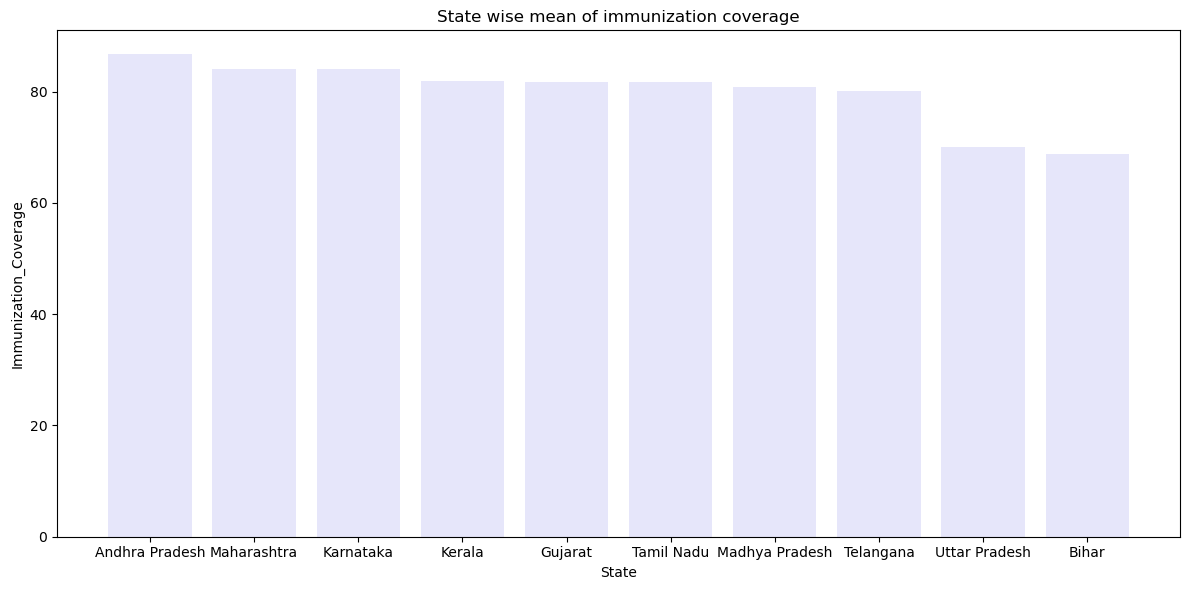

In [13]:
import matplotlib.pyplot as plt
avg_IC = df.groupby('State')['Immunization_Coverage'].mean().sort_values(ascending = False)
plt.figure(figsize = (12,6))
plt.bar(avg_IC.index,avg_IC.values, color='lavender')
plt.title('State wise mean of immunization coverage')
plt.xlabel('State')
plt.ylabel('Immunization_Coverage')
plt.tight_layout()
plt.show()

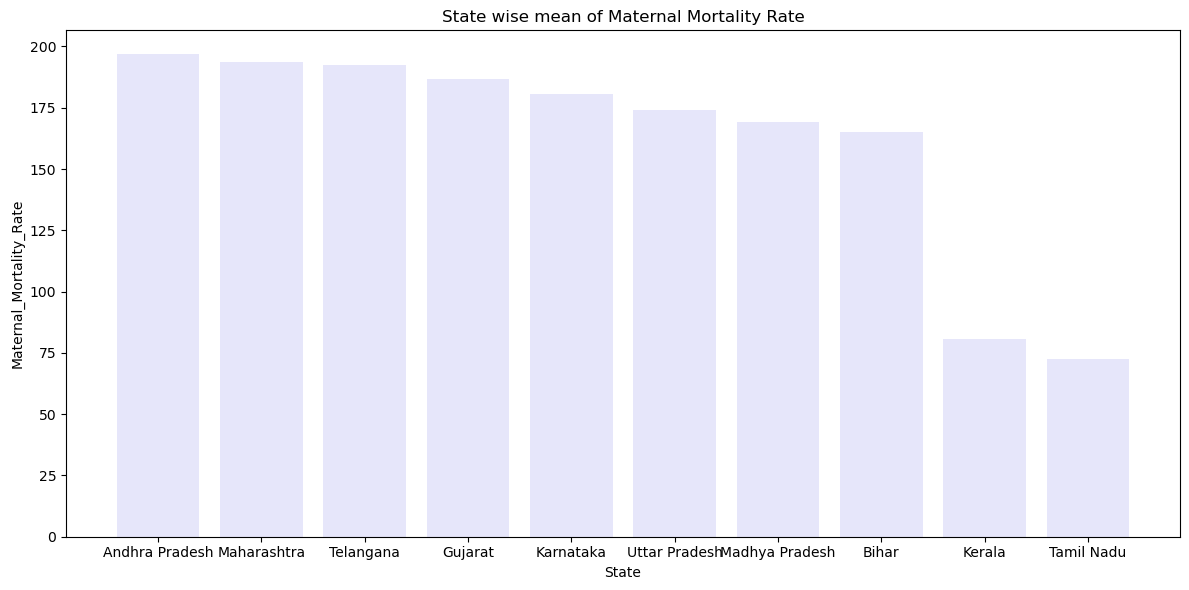

In [14]:
avg_MMR = df.groupby('State')['Maternal_Mortality_Rate'].mean().sort_values(ascending = False)
plt.figure(figsize = (12,6))
plt.bar(avg_MMR.index,avg_MMR.values, color='lavender')
plt.title('State wise mean of Maternal Mortality Rate')
plt.xlabel('State')
plt.ylabel('Maternal_Mortality_Rate')
plt.tight_layout()
plt.show()

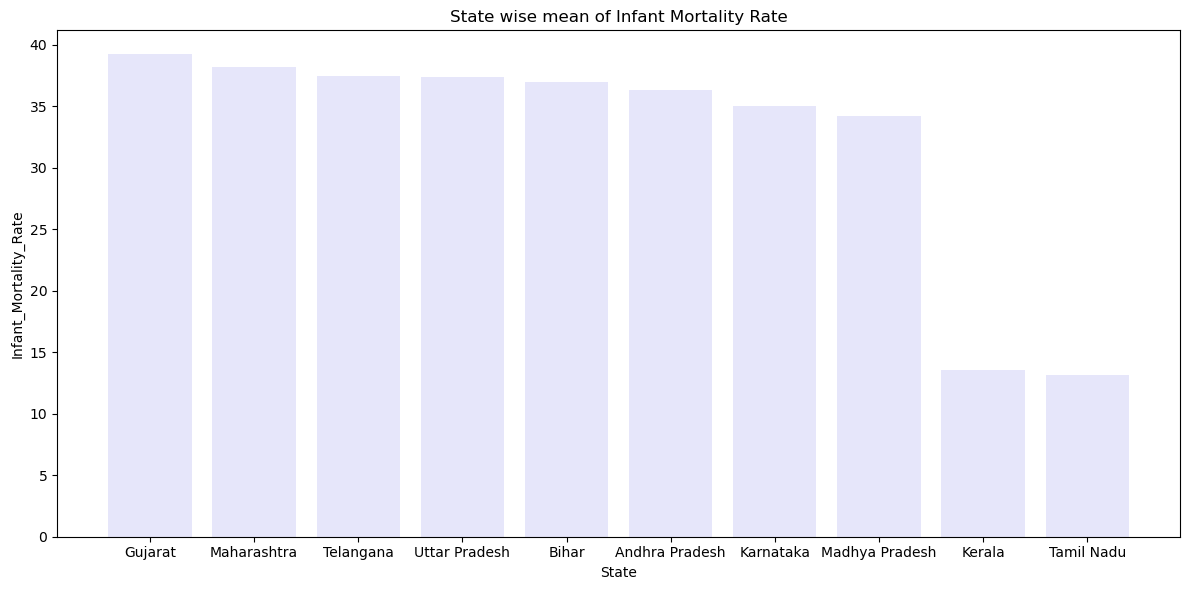

In [15]:
avg_IMR = df.groupby('State')['Infant_Mortality_Rate'].mean().sort_values(ascending = False)
plt.figure(figsize = (12,6))
plt.bar(avg_IMR.index,avg_IMR.values, color='lavender')
plt.title('State wise mean of Infant Mortality Rate')
plt.xlabel('State')
plt.ylabel('Infant_Mortality_Rate')
plt.tight_layout()
plt.show()

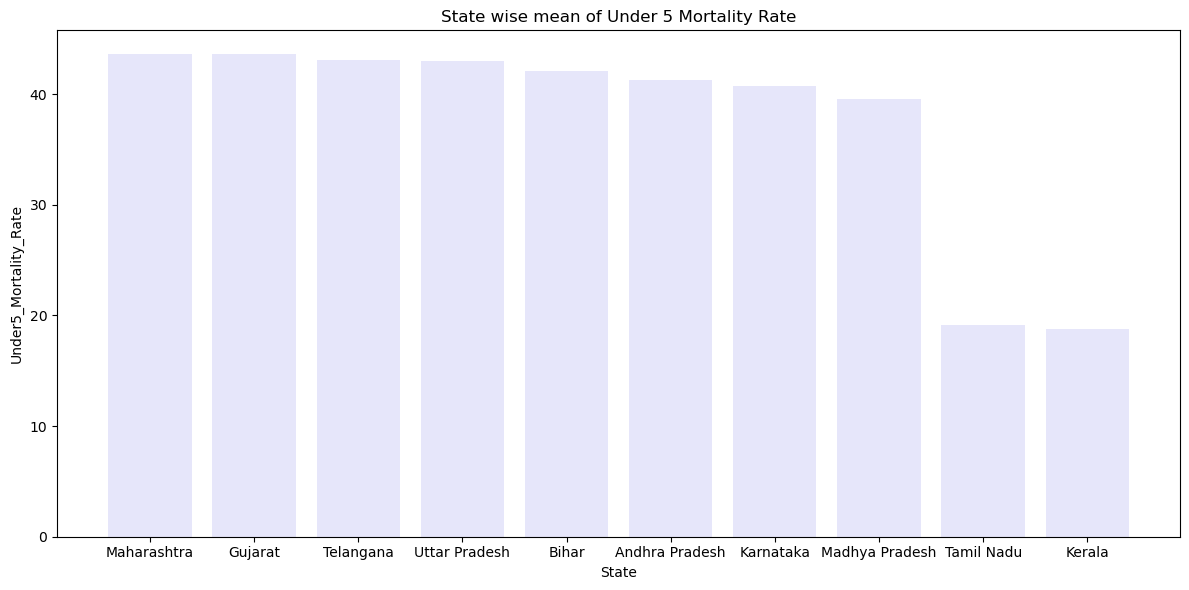

In [16]:
avg_UMR = df.groupby('State')['Under5_Mortality_Rate'].mean().sort_values(ascending = False)
plt.figure(figsize = (12,6))
plt.bar(avg_UMR.index,avg_UMR.values, color='lavender')
plt.title('State wise mean of Under 5 Mortality Rate')
plt.xlabel('State')
plt.ylabel('Under5_Mortality_Rate')
plt.tight_layout()
plt.show()